# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [54]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 584
['burutu', 'hermanus', 'bikenibeu village', 'island harbour', 'turkmenbasy', 'yei', 'whitehorse', 'adamstown', 'sisimiut', 'grytviken', 'margaret river', 'bulungu', 'avarua', 'georgetown', 'fale old settlement', 'knyaze-volkonskoye', 'new norfolk', 'blackmans bay', 'sibolga', 'taiohae', 'margate', 'ilulissat', 'albany', 'santana', 'al kharijah', "nar'yan-mar", 'punta arenas', 'suntar', 'edinburgh of the seven seas', 'san patricio', 'namibe', 'balabac', 'las heras', 'yellowknife', 'waitangi', 'iqaluit', 'xiva', 'macheng', 'sambava', 'stanley', 'invercargill', 'kapit', 'muragacha', 'saint-hyacinthe', 'olonkinbyen', 'tralee', 'vingt cinq', 'axim', 'port-aux-francais', 'utrik', 'benjamin constant', 'talnakh', 'newman', 'thompson', 'luderitz', 'isafjordur', 'bredasdorp', 'puerto armuelles', 'port mathurin', 'pandan', 'port alfred', 'ash shafa', "nuku'alofa", 'tura', 'camacupa', 'i-n-salah', 'badger', 'nova sintra', 'moapa valley', 'saipan', "kapa'a", 'ushua

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [56]:
# Set the API base URL
url = "https://history.openweathermap.org/data/2.5/history/city?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #params = {
       # 'Lattitude':{lat},
       # 'Longitude':lon,
       # 'date':date,
        #'appid':appid   
   # }
      
    
    
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={weather_api_key}"
    response = requests.get(city_url).json()
    #print(city_url)

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}".format((record_count, set_count, city)))
    
   

    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as error:
        print("City not found. Skipping...")
        print(error)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | burutu
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | bikenibeu village
Processing Record 4 of Set 1 | island harbour
Processing Record 5 of Set 1 | turkmenbasy
Processing Record 6 of Set 1 | yei
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | bulungu
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | fale old settlement
Processing Record 16 of Set 1 | knyaze-volkonskoye
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | sibolga
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
'weather'
Processing Record 21 of Set 1 | margate
Proc

Processing Record 37 of Set 4 | toga village
City not found. Skipping...
'weather'
Processing Record 38 of Set 4 | ta`u
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | touros
Processing Record 41 of Set 4 | la ronge
Processing Record 42 of Set 4 | kununurra
Processing Record 43 of Set 4 | roma
Processing Record 44 of Set 4 | woolgoolga
Processing Record 45 of Set 4 | mathis
Processing Record 46 of Set 4 | enewetak
Processing Record 47 of Set 4 | jalgaon
Processing Record 48 of Set 4 | haiku-pauwela
Processing Record 49 of Set 4 | leava
Processing Record 0 of Set 5 | comayagua
Processing Record 1 of Set 5 | kingston
Processing Record 2 of Set 5 | aasiaat
Processing Record 3 of Set 5 | ordos
City not found. Skipping...
'weather'
Processing Record 4 of Set 5 | st. john's
Processing Record 5 of Set 5 | tallkayf
Processing Record 6 of Set 5 | linfen
Processing Record 7 of Set 5 | cangzhou
Processing Record 8 of Set 5 | geidam
Processing Record 9 of Set 5 | puerto ayor

Processing Record 29 of Set 8 | borogontsy
Processing Record 30 of Set 8 | chivhu
Processing Record 31 of Set 8 | sawakin
Processing Record 32 of Set 8 | riosucio
Processing Record 33 of Set 8 | eforie sud
Processing Record 34 of Set 8 | daru
Processing Record 35 of Set 8 | bataipora
Processing Record 36 of Set 8 | brush
Processing Record 37 of Set 8 | balqash
Processing Record 38 of Set 8 | hasaki
Processing Record 39 of Set 8 | antsiranana
Processing Record 40 of Set 8 | usogorsk
Processing Record 41 of Set 8 | egilsstadir
Processing Record 42 of Set 8 | markaz-e woluswali-ye achin
Processing Record 43 of Set 8 | sari
Processing Record 44 of Set 8 | hai duong
Processing Record 45 of Set 8 | tamandare
Processing Record 46 of Set 8 | cuyamel
Processing Record 47 of Set 8 | tindouf
Processing Record 48 of Set 8 | harstad
Processing Record 49 of Set 8 | lyubinskiy
Processing Record 0 of Set 9 | joao pinheiro
Processing Record 1 of Set 9 | vila franca do campo
Processing Record 2 of Set 9

Processing Record 15 of Set 12 | sarykemer
Processing Record 16 of Set 12 | quellon
Processing Record 17 of Set 12 | kailua-kona
Processing Record 18 of Set 12 | saudarkrokur
Processing Record 19 of Set 12 | kolwezi
Processing Record 20 of Set 12 | kafanchan
Processing Record 21 of Set 12 | alofi
Processing Record 22 of Set 12 | fort st. john
Processing Record 23 of Set 12 | charters towers
Processing Record 24 of Set 12 | boa vista
Processing Record 25 of Set 12 | aransas pass
Processing Record 26 of Set 12 | banda aceh
Processing Record 27 of Set 12 | vicuna mackenna
Processing Record 28 of Set 12 | laojunmiao
Processing Record 29 of Set 12 | praia da vitoria
Processing Record 30 of Set 12 | olyokminsk
Processing Record 31 of Set 12 | magdagachi
Processing Record 32 of Set 12 | santo angelo
Processing Record 33 of Set 12 | puerto san jose
-----------------------------
Data Retrieval Complete      
-----------------------------


In [57]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [58]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,burutu,5.3509,5.5076,28.16,73,54,5.28,NG,1696177455
1,hermanus,-34.4187,19.2345,17.31,65,0,6.15,ZA,1696177455
2,bikenibeu village,1.3673,173.1241,27.98,83,40,0.51,KI,1696177455
3,island harbour,50.7240,-1.2758,20.52,89,99,2.24,GB,1696177343
4,turkmenbasy,40.0222,52.9552,21.43,24,0,2.06,TM,1696177455


In [59]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [60]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,burutu,5.3509,5.5076,28.16,73,54,5.28,NG,1696177455
1,hermanus,-34.4187,19.2345,17.31,65,0,6.15,ZA,1696177455
2,bikenibeu village,1.3673,173.1241,27.98,83,40,0.51,KI,1696177455
3,island harbour,50.7240,-1.2758,20.52,89,99,2.24,GB,1696177343
4,turkmenbasy,40.0222,52.9552,21.43,24,0,2.06,TM,1696177455


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

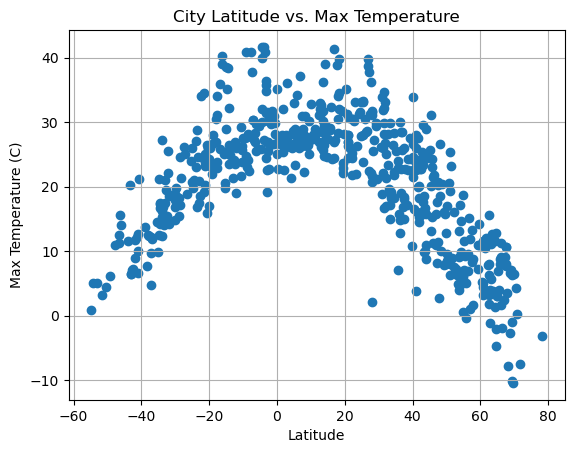

In [61]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

#### Latitude Vs. Humidity

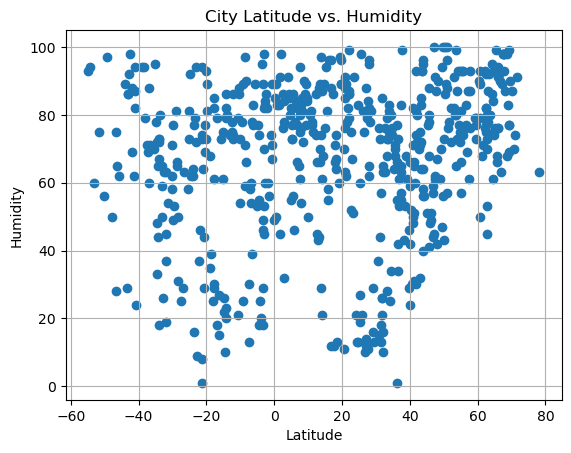

In [62]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

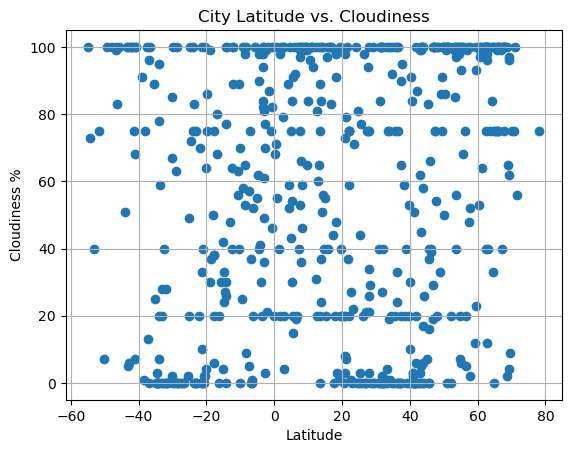

In [63]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

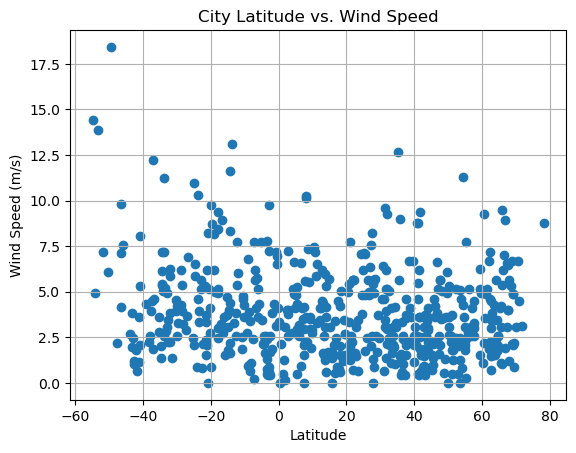

In [64]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
#

In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,burutu,5.3509,5.5076,28.16,73,54,5.28,NG,1696177455
2,bikenibeu village,1.3673,173.1241,27.98,83,40,0.51,KI,1696177455
3,island harbour,50.7240,-1.2758,20.52,89,99,2.24,GB,1696177343
4,turkmenbasy,40.0222,52.9552,21.43,24,0,2.06,TM,1696177455
5,yei,4.0950,30.6779,21.37,91,89,2.72,SS,1696177456


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,17.31,65,0,6.15,ZA,1696177455
7,adamstown,-25.0660,-130.1015,20.71,81,49,10.94,PN,1696177386
9,grytviken,-54.2811,-36.5092,5.13,94,73,4.95,GS,1696177456
10,margaret river,-33.9500,115.0667,12.35,73,95,11.25,AU,1696177456
11,bulungu,-4.5500,18.6000,30.05,55,90,2.13,CD,1696177457


###  Temperature vs. Latitude Linear Regression Plot

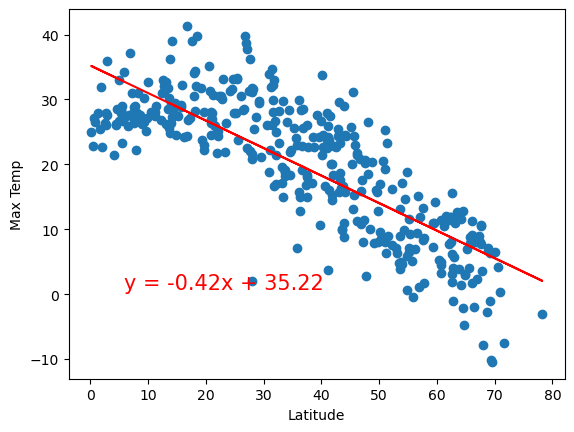

The r-value is:0.6541039988794409


In [68]:
# Linear regression on Northern Hemisphere
nh_x_values = northern_hemi_df['Lat']
nh_y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_x_values, nh_y_values)
regress_values = nh_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_x_values, nh_y_values)
plt.plot(nh_x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

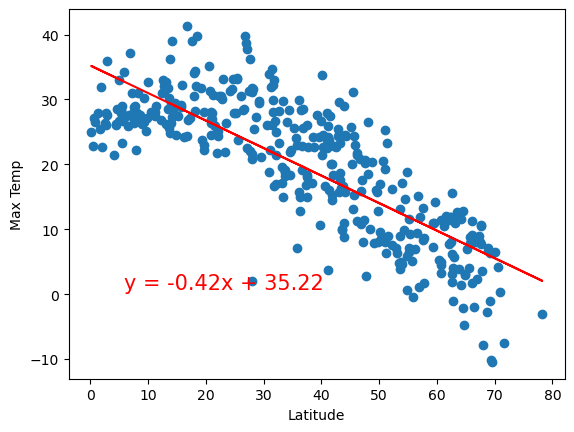

The r-value is:0.6541039988794409


In [69]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
sh_x_values = northern_hemi_df['Lat']
sh_y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_x_values, sh_y_values)
regress_values = sh_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_x_values, nh_y_values)
plt.plot(nh_x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

**Discussion about the linear relationship:** There seems to be a strong inverse correlation between lattitude and temperature 

### Humidity vs. Latitude Linear Regression Plot

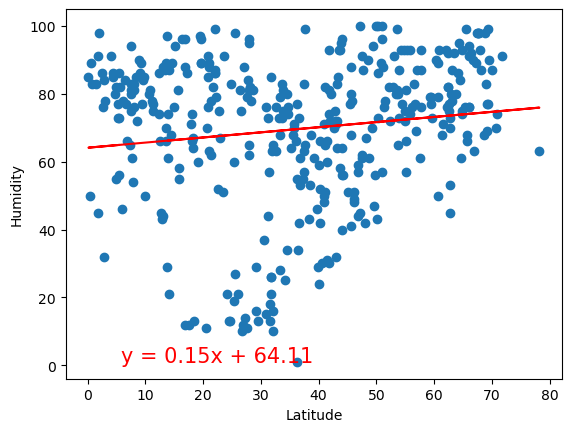

The r-value is:0.01871494022257297


In [70]:
# Northern Hemisphere
nh_lat = northern_hemi_df['Lat']
nh_hum = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_hum)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_lat, nh_hum)
plt.plot(nh_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

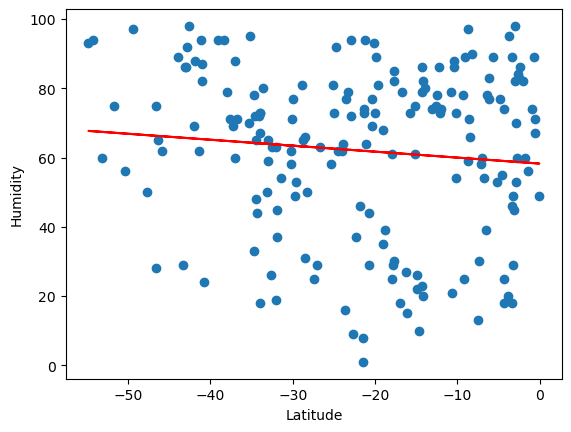

The r-value is:0.010348082360797895


In [71]:
# Southern Hemisphere
sh_lat = southern_hemi_df['Lat']
sh_hum = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_hum)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_lat, sh_hum)
plt.plot(sh_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

**Discussion about the linear relationship:** There is virtually no correlation between humidity and lattitude

### Cloudiness vs. Latitude Linear Regression Plot

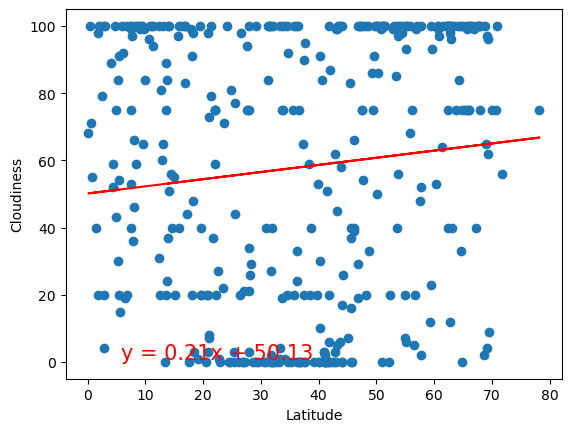

The r-value is:0.011593015469573037


In [72]:
# Northern Hemisphere
nh_lat = northern_hemi_df['Lat']
nh_cloudiness = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_cloudiness)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_lat, nh_cloudiness)
plt.plot(nh_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

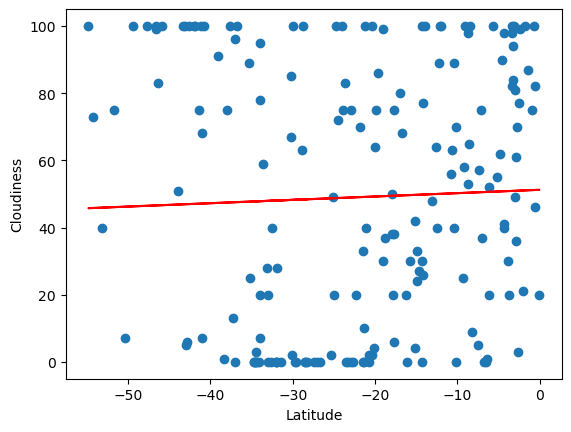

The r-value is:0.001367046198819698


In [73]:
# Southern Hemisphere
sh_lat = southern_hemi_df['Lat']
sh_cloudiness = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_cloudiness)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_lat, sh_cloudiness)
plt.plot(sh_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

**Discussion about the linear relationship:** There is a weak correlation between cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

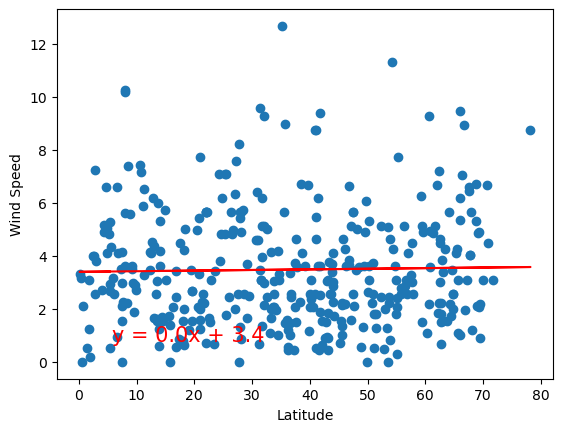

The r-value is:0.00044730896920579114


In [74]:
# Northern Hemisphere
nh_lat = northern_hemi_df['Lat']
nh_wind_speed = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_wind_speed)
regress_values = nh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nh_lat, nh_wind_speed)
plt.plot(nh_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

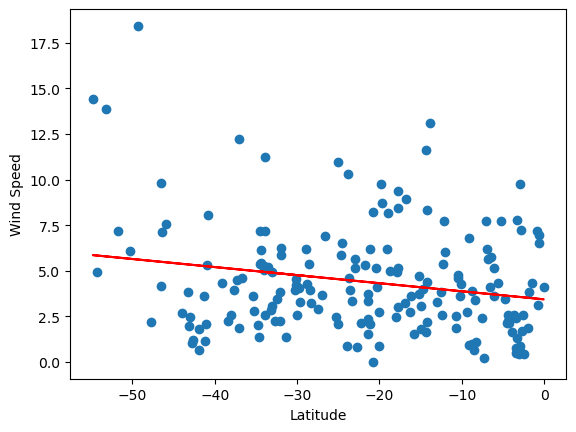

The r-value is:0.04415054235913939


In [75]:
# Southern Hemisphere
sh_lat = southern_hemi_df['Lat']
sh_wind_speed = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_wind_speed)
regress_values = sh_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sh_lat, sh_wind_speed)
plt.plot(sh_lat,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.show()
print(f'The r-value is:{rvalue**2}')

**Discussion about the linear relationship:** There seems to be a slight correlation between wind speed and latitude in the southern hemisphere, but it is still a weak corelation